In [24]:
!pip install openpyxl

In [25]:
import os
import io
import collections
import pandas as pd
import matplotlib.pyplot as plt
from rdflib import ConjunctiveGraph
from rdflib.plugins.sparql.results.csvresults import CSVResultSerializer

pd.set_option('display.max_colwidth', 200)

if not os.path.exists('outputs'):
    os.makedirs('outputs')
    
g = ConjunctiveGraph()
g.parse('data.trig', format='trig')

def query(q):
    serializer = CSVResultSerializer(g.query(q))
    output = io.BytesIO()
    serializer.serialize(output)
    return pd.read_csv(io.StringIO(output.getvalue().decode('utf-8')), encoding='utf-8')
    
def write(df, fn):
    df.to_excel('outputs/{}'.format(fn), encoding='utf-8')

In [26]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?date ?ri_acronym ?ri_website ?ri_domain ?rep_label WHERE {
    ?g dcterms:date ?date .
    GRAPH ?g { 
        ?ri a rm:ResearchInfrastructure .
        ?ri envri:acronym ?ri_acronym . 
        ?ri envri:website ?ri_website .
        ?ri envri:hasDomain ?ri_domain .
        ?ri envri:hasRepository ?rep .
        ?rep a envri:Repository .
        ?rep rdfs:label ?rep_label .
    }
    # FILTER (?date > "2019-01-01"^^xsd:date)
    FILTER (?ri_acronym = "ICOS")
}
""")

display(q)
write(q, 'output-1repos.xlsx')

,date,ri_acronym,ri_website,ri_domain,rep_label
0,2019-04-01,ICOS,http://www.icos-cp.eu,n407,Carbon Portal


In [27]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?vocab_name ?vocab_iri WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasVocabularies [
           envri:hasName ?vocab_name ;
           envri:hasVocabularyIri ?vocab_iri 
         ]
       ]
}
""")

display(q)
write(q, 'output-2.xlsx')

,rep_label,vocab_name,vocab_iri
0,IAGOS repository,CF Standard Names,http://cfconventions.org/standard-names.html
1,norwegian Meteorological Institute,http://envri.eu/ns/NULL,https://github.com/steingod/scivocab/
2,RESIF (France),http://envri.eu/ns/NULL,http://envri.eu/ns/NULL
3,Terradue,http://envri.eu/ns/none,http://envri.eu/ns/NULL
4,GRES,CF-standard names,http://cfconventions.org/latest.html
5,ACTRIS-ACCESS,CF standard names,http://cfconventions.org/latest.html
6,VERCE Seismic Forward Modeling Experimental Data,S-PROV,https://github.com/KNMI/s-provenance/blob/master/resources/s-prov-o.owl
7,SeaDataNet Central Data Products,NERC vocabulary service,http://vocab.nerc.ac.uk/collection/V22/current/
8,SeaDataNet Central Data Products,ISO 19115/19139,http://standards.iso.org/ittf/PubliclyAvailableStandards/ISO_19139_Schemas/resources/codelist/ML_gmxCodelists.xml
9,SeaDataNet Central Data Products,SeaDataNet CDI,https://cdi.seadatanet.org


In [28]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>

SELECT ?p WHERE {
    ?p envri:relatesTo fairterms:A1.2 .
}
""")

display(q)
write(q, 'output-3.xlsx')

,p
0,http://envri.eu/ns/contentAccessAuthorizationRequired
1,http://envri.eu/ns/hasAuthenticationMethod
2,http://envri.eu/ns/maintainsOwnUserDatabase
3,http://envri.eu/ns/usesAuthorisationTechnique


In [29]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-4.xlsx')

,l,p,o,li
0,EPOS European Federated Data Archive metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q2115,NaN
1,ACTRIS EARLINET Database metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q192588,NaN
2,ACTRIS CLOUDNET metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q192588,NaN
3,EPOS local EU-EIDA metadata,http://envri.eu/ns/hasPrimaryStorageFormat,http://envri.eu/ns/SEED,NaN
4,ACTRIS ASC metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q1165204,NaN
...,...,...,...,...
304,IAGOS IAGOS repository metadata,http://envri.eu/ns/supportedExportFormats,n480,https://www.wikidata.org/entity/Q2063
305,IAGOS IAGOS repository metadata,http://envri.eu/ns/supportedExportFormats,n480,https://www.wikidata.org/entity/Q54872
306,IAGOS IAGOS repository metadata,http://envri.eu/ns/supportedExportFormats,n480,https://www.wikidata.org/entity/Q2115
307,ACTRIS GRES metadata,http://envri.eu/ns/supportedExportFormats,n871,https://www.wikidata.org/entity/Q2063


In [30]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?schema_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName ?schema_name
           ]
         ]
       ]
}
""")

display(q)
write(q, 'output-5.xlsx')

,rep_label,schema_name
0,IAGOS repository,http://envri.eu/ns/INSPIRE
1,norwegian Meteorological Institute,https://www.wikidata.org/entity/Q50377276
2,RESIF (France),http://envri.eu/ns/FDSNStationXML
3,Terradue,http://envri.eu/ns/ISO19119
4,GRES,https://www.wikidata.org/entity/Q30079268
5,ACTRIS-ACCESS,http://envri.eu/ns/NasaAmesASCII
6,VERCE Seismic Forward Modeling Experimental Data,https://github.com/KNMI/s-provenance
7,SeaDataNet Central Data Products,http://envri.eu/ns/ISO19115_19139
8,SeaDataNet Central Data Products,http://envri.eu/ns/SeaDataNetCommunityProfile
9,EPOS INGV,http://envri.eu/ns/FDSNStation


In [31]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I1_metadata.xlsx')

,l,p,o,li
0,EPOS European Federated Data Archive metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q2115,NaN
1,ACTRIS EARLINET Database metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q192588,NaN
2,ACTRIS CLOUDNET metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q192588,NaN
3,EPOS local EU-EIDA metadata,http://envri.eu/ns/hasPrimaryStorageFormat,http://envri.eu/ns/SEED,NaN
4,ACTRIS ASC metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q1165204,NaN
...,...,...,...,...
304,IAGOS IAGOS repository metadata,http://envri.eu/ns/supportedExportFormats,n480,https://www.wikidata.org/entity/Q2063
305,IAGOS IAGOS repository metadata,http://envri.eu/ns/supportedExportFormats,n480,https://www.wikidata.org/entity/Q54872
306,IAGOS IAGOS repository metadata,http://envri.eu/ns/supportedExportFormats,n480,https://www.wikidata.org/entity/Q2115
307,ACTRIS GRES metadata,http://envri.eu/ns/supportedExportFormats,n871,https://www.wikidata.org/entity/Q2063


In [32]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1persistency.xlsx')

,l,p,o,li
0,ANAEE-France ANAEE-France Metadata Catalog data processing,http://envri.eu/ns/otherAnalysisServicesOffered,http://envri.eu/ns/none,NaN
1,SDN SeaDataNet Central Data Products data processing,http://envri.eu/ns/otherAnalysisServicesOffered,http://envri.eu/ns/planned,NaN
2,LW (Marine) Marine Data Archive data processing,http://envri.eu/ns/otherAnalysisServicesOffered,http://envri.eu/ns/none,NaN
3,SDN SeaDataNet Common DAta Index (CDI) data processing,http://envri.eu/ns/otherAnalysisServicesOffered,http://envri.eu/ns/planned,NaN
4,ACTRIS GRES data processing,http://envri.eu/ns/otherAnalysisServicesOffered,http://envri.eu/ns/planned,NaN
5,LifeWatch LifeWatch Italy Portal data processing,http://envri.eu/ns/otherAnalysisServicesOffered,n380,https://www.wikidata.org/entity/Q2055062
6,SIOS norwegian Meteorological Institute data processing,http://envri.eu/ns/otherAnalysisServicesOffered,http://envri.eu/ns/none,NaN
7,ACTRIS EARLINET Database data processing,http://envri.eu/ns/otherAnalysisServicesOffered,n757,http://envri.eu/ns/QA_QC
8,ACTRIS EARLINET Database data processing,http://envri.eu/ns/otherAnalysisServicesOffered,n757,http://envri.eu/ns/DOIGeneration
9,EISCAT EISCAT Schedule data processing,http://envri.eu/ns/otherAnalysisServicesOffered,http://envri.eu/ns/none,NaN


In [33]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A2nix.xlsx')

,l,p,o,li


In [34]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1.1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1_1access.xlsx')

,l,p,o,li
0,ACTRIS ACTRIS - In-Situ unit access mechanism,http://envri.eu/ns/hasAccessProtocolUrl,https://www.opendap.org/,NaN
1,LW (Marine) Marine Data Archive access mechanism,http://envri.eu/ns/hasAccessProtocolUrl,https://doi.org/10.17487%2FRFC2616,NaN
2,ACTRIS ASC access mechanism,http://envri.eu/ns/hasAccessProtocolUrl,https://www.w3.org/wiki/UriSchemes/http,NaN
3,EPOS VERCE Seismic Forward Modeling Experimental Data access mechanism,http://envri.eu/ns/hasAccessProtocolUrl,https://www.eosc-hub.eu/training-material/federated-aai-eida-services,NaN
4,ACTRIS EARLINET Database access mechanism,http://envri.eu/ns/hasAccessProtocolUrl,https://www.opendap.org/,NaN
...,...,...,...,...
62,SDN SeaDataNet Common DAta Index (CDI) access mechanism,http://envri.eu/ns/supportsAccessTechnology,http://www.wikidata.org/entity/Q628566,NaN
63,Euro-Argo Euro-Argo Data access mechanism,http://envri.eu/ns/supportsAccessTechnology,https://www.wikidata.org/entity/Q42283,NaN
64,eLTER DEIMS-SDR access mechanism,http://envri.eu/ns/supportsAccessTechnology,http://envri.eu/ns/LocalLDAP,NaN
65,ACTRIS CLOUDNET access mechanism,http://envri.eu/ns/supportsAccessTechnology,https://www.wikidata.org/entity/Q513000,NaN


In [35]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1.2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1_2accesstechn.xlsx')

,l,p,o,li
0,SIOS norwegian Polar Data Centre access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,false,NaN
1,ACTRIS ACTRIS - In-Situ unit access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,partially,NaN
2,LW (Marine) Marine Data Archive access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,false,NaN
3,ACTRIS ASC access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,false,NaN
4,EPOS MySQL access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,false,NaN
...,...,...,...,...
98,EISCAT EISCAT Schedule access mechanism,http://envri.eu/ns/usesAuthorisationTechnique,http://envri.eu/ns/localTechnique,NaN
99,SDN SeaDataNet Common DAta Index (CDI) access mechanism,http://envri.eu/ns/usesAuthorisationTechnique,https://www.wikidata.org/entity/Q743238,NaN
100,Euro-Argo Euro-Argo Data access mechanism,http://envri.eu/ns/usesAuthorisationTechnique,https://www.wikidata.org/entity/Q513000,NaN
101,ACTRIS CLOUDNET access mechanism,http://envri.eu/ns/usesAuthorisationTechnique,https://www.wikidata.org/entity/Q513000,NaN


In [36]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I2vocab.xlsx')

,l,p,o,li
0,EPOS European Federated Data Archive metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,true,NaN
1,ACTRIS EARLINET Database metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,false,NaN
2,ACTRIS CLOUDNET metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,false,NaN
3,EPOS local EU-EIDA metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,true,NaN
4,ACTRIS ASC metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,partially,NaN
...,...,...,...,...
65,LifeWatch LifeWatch Italy Portal vocabularies,http://envri.eu/ns/hasVocabularyIri,http://thesauri.lifewatchitaly.eu/PhytoTraits/,NaN
66,SDN SeaDataNet Central Data Products vocabularies,http://envri.eu/ns/hasVocabularyIri,https://edmo.seadatanet.org,NaN
67,LifeWatch LifeWatch Italy Portal vocabularies,http://envri.eu/ns/hasVocabularyIri,http://thesauri.lifewatchitaly.eu/,NaN
68,SDN SeaDataNet Central Data Products vocabularies,http://envri.eu/ns/hasVocabularyIri,https://cdi.seadatanet.org,NaN


In [37]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I3.xlsx')

,l,p,o,li


In [38]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1.xlsx')

,l,p,o,li


In [39]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_1_license.xlsx')

,l,p,o,li
0,EPOS repository,http://envri.eu/ns/hasPolicies,n605,http://envri.eu/ns/Citation
1,EPOS repository,http://envri.eu/ns/hasPolicies,n605,http://envri.eu/ns/Acknowledgements
2,LW (Marine) repository,http://envri.eu/ns/hasPolicies,n697,http://envri.eu/ns/TermsOfUse
3,LW (Marine) repository,http://envri.eu/ns/hasPolicies,n697,https://www.wikidata.org/entity/Q189293
4,EPOS repository,http://envri.eu/ns/hasPolicies,http://envri.eu/ns/none,NaN
...,...,...,...,...
137,SDN SeaDataNet Common DAta Index (CDI) access mechanism,http://envri.eu/ns/usesDataLicenses,n527,http://envri.eu/ns/LocalLicense
138,Euro-Argo Euro-Argo Data access mechanism,http://envri.eu/ns/usesDataLicenses,n251,http://www.wikidata.org/entity/Q20007257
139,eLTER DEIMS-SDR access mechanism,http://envri.eu/ns/usesDataLicenses,n216,http://www.wikidata.org/entity/Q34179348
140,ACTRIS CLOUDNET access mechanism,http://envri.eu/ns/usesDataLicenses,http://envri.eu/ns/none,NaN


In [40]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_2prov.xlsx')

,l,p,o,li
0,ACTRIS EARLINET Database metadata,http://envri.eu/ns/hasMachineReadableProvenance,true,NaN
1,ACTRIS CLOUDNET metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
2,ACTRIS ASC metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
3,ACTRIS ACTRIS - In-Situ unit metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
4,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
5,EISCAT EISCAT Schedule metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
6,EPOS MySQL metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
7,EISCAT Madrigal metadata,http://envri.eu/ns/hasMachineReadableProvenance,http://envri.eu/ns/planned,NaN
8,EPOS Terradue metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
9,SDN SeaDataNet Central Data Products metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN


In [41]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_3.xlsx')

,l,p,o,li
0,CLOUDNET data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
1,Madrigal data management plans,http://envri.eu/ns/hasComplianceValidationService,true,NaN
2,ACTRIS - In-Situ unit data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
3,EPOS CSW data management plans,http://envri.eu/ns/hasComplianceValidationService,true,NaN
4,EPOS INGV data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
5,norwegian Polar Data Centre data management plans,http://envri.eu/ns/hasComplianceValidationService,true,NaN
6,Marine Data Archive data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
7,EISCAT Schedule data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
8,Euro-Argo Data data management plans,http://envri.eu/ns/hasComplianceValidationService,true,NaN
9,IAGOS repository data management plans,http://envri.eu/ns/hasComplianceValidationService,true,NaN


In [42]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F1ID.xlsx')

,l,p,o,li
0,ACTRIS ASC identifier,http://envri.eu/ns/usesIdentifierSystem,https://www.wikidata.org/entity/Q73747105,NaN
1,EPOS European Federated Data Archive identifier,http://envri.eu/ns/usesIdentifierSystem,http://envri.eu/ns/ePIC,NaN
2,IAGOS IAGOS repository identifier,http://envri.eu/ns/usesIdentifierSystem,https://www.wikidata.org/entity/Q25670,NaN
3,ICOS Carbon Portal identifier,http://envri.eu/ns/usesIdentifierSystem,https://www.wikidata.org/entity/Q1575058,NaN
4,Euro-Argo Euro-Argo Data identifier,http://envri.eu/ns/usesIdentifierSystem,https://www.wikidata.org/entity/Q25670,NaN
...,...,...,...,...
83,ACTRIS ACTRIS - In-Situ unit identifier,http://envri.eu/ns/usesProvider,http://envri.eu/ns/none,NaN
84,LW (Marine) EUROBIS identifier,http://envri.eu/ns/usesProvider,https://www.wikidata.org/entity/Q11412386,NaN
85,ACTRIS GRES identifier,http://envri.eu/ns/usesProvider,https://www.wikidata.org/entity/Q58333293,NaN
86,SDN SeaDataNet Common DAta Index (CDI) identifier,http://envri.eu/ns/usesProvider,https://www.wikidata.org/entity/Q50177245,NaN


In [43]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F2machinereadab.xlsx')

,l,p,o,li
0,EPOS MySQL identifier,http://envri.eu/ns/includesMetadataSchema,http://envri.eu/ns/none,NaN
1,EPOS European Federated Data Archive identifier,http://envri.eu/ns/includesMetadataSchema,http://envri.eu/ns/none,NaN
2,ICOS Carbon Portal identifier,http://envri.eu/ns/includesMetadataSchema,http://envri.eu/ns/none,NaN
3,EPOS EPOS CSW identifier,http://envri.eu/ns/includesMetadataSchema,http://envri.eu/ns/none,NaN
4,ACTRIS CLOUDNET identifier,http://envri.eu/ns/includesMetadataSchema,http://envri.eu/ns/planned,NaN
...,...,...,...,...
76,SIOS norwegian Polar Data Centre metadata schema,http://envri.eu/ns/includesProvenanceFields,https://www.wikidata.org/entity/Q513000,NaN
77,LifeWatch LifeWatch Italy Portal metadata schema,http://envri.eu/ns/includesProvenanceFields,n388,http://envri.eu/ns/TextOnly
78,EPOS VERCE Seismic Forward Modeling Experimental Data metadata schema,http://envri.eu/ns/includesProvenanceFields,n312,http://envri.eu/ns/ProvO
79,SDN SeaDataNet Common DAta Index (CDI) metadata schema,http://envri.eu/ns/includesProvenanceFields,http://envri.eu/ns/planned,NaN


In [44]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F3pidsincl.xlsx')

,l,p,o,li
0,EPOS European Federated Data Archive metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,partially,NaN
1,ACTRIS EARLINET Database metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,true,NaN
2,ACTRIS CLOUDNET metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,false,NaN
3,EPOS local EU-EIDA metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,false,NaN
4,ACTRIS ASC metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,true,NaN
5,ACTRIS ACTRIS - In-Situ unit metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,false,NaN
6,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,http://envri.eu/ns/planned,NaN
7,EISCAT EISCAT Schedule metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,https://www.wikidata.org/entity/Q513000,NaN
8,EPOS MySQL metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,true,NaN
9,EISCAT Madrigal metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,https://www.wikidata.org/entity/Q513000,NaN


In [45]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F4 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F4sofware.xlsx')

,l,p,o,li
0,ACTRIS EARLINET Database metadata,http://envri.eu/ns/searchEngineIndexing,true,NaN
1,ACTRIS CLOUDNET metadata,http://envri.eu/ns/searchEngineIndexing,false,NaN
2,ACTRIS ASC metadata,http://envri.eu/ns/searchEngineIndexing,false,NaN
3,ACTRIS ACTRIS - In-Situ unit metadata,http://envri.eu/ns/searchEngineIndexing,false,NaN
4,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/searchEngineIndexing,http://envri.eu/ns/planned,NaN
...,...,...,...,...
208,LW (Marine) Marine Data Archive metadata,http://envri.eu/ns/hasLocalSearchEngineUrl,http://www.vliz.be/en/integrated-marine-information-system,NaN
209,EPOS EPOS INGV metadata,http://envri.eu/ns/hasLocalSearchEngineUrl,https://www.orfeus-eu.org/webdc3/,NaN
210,SIOS norwegian Meteorological Institute metadata,http://envri.eu/ns/hasLocalSearchEngineUrl,https://sios-svalbard.org/metadata_search,NaN
211,IAGOS IAGOS repository metadata,http://envri.eu/ns/hasLocalSearchEngineUrl,http://catalogue2.sedoo.fr/geonetwork/srv/eng/catalog.search#/home,NaN


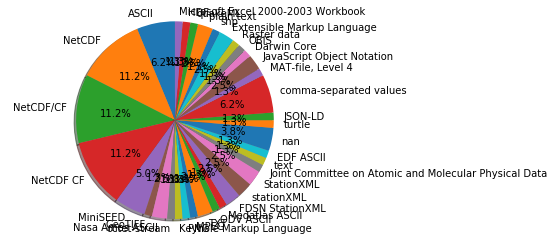

In [46]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?rep_label ?format_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasData [
           envri:hasPreferredFormat [
             envri:hasFormatName [ rdfs:label ?format_name ]
          ]
         ]
       ]
}
""")

# display(q)
write(q, 'output-6format.xlsx')

c = collections.Counter(q['format_name'])

labels = list(c.keys())
sizes = list(c.values())
fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()